### Univariate time series prediction  
- In these notebook we are going to go through univariate prediction as a time series data operation and analysis process
- We are going to consider the 2021 River Muringato daily-mean water level data.
- we will consider a baseline prediction model and an algorithm and lastly compare the preformance of both.
    - **Baseline**
    - **Algorithm (ARIMA)**
    
### Data description
*Time Series Stretch* : From 19th February 2021 to 1st December 2021.

*Count : Total data samples* : 286 daily mean figures, matching the 286 days 

#### Import the required python packages 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import warnings
warnings. filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9,5)

#### Data import and visualization 

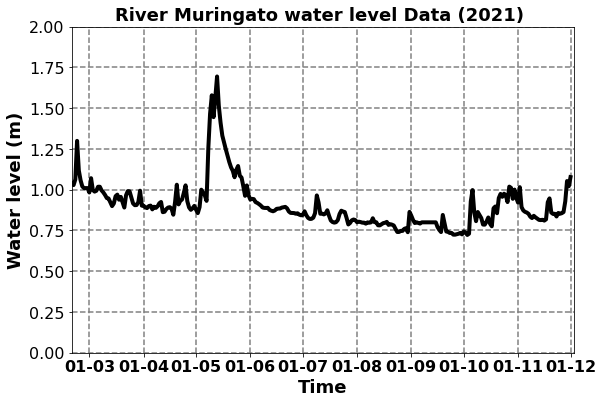

In [3]:
from support import dailymean_plot
df = pd.read_csv('data/2021_daily_mean_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime,format="%d/%m/%Y")
data = dailymean_plot(df)

## Prediction using a baseline  
- Extract a **window size** (number of  sample data points considered prior to the target datapoint).
- Compute the average of the data window extracted.
- The mean is the prediction.
![WINDOW.PNG](img/WINDOW.PNG)

In [4]:
# THE WINDOWING FUNCTION 
def window_stage(series, window_size):
    x, y = list(), list()
    for i in range(len(series)):
        end_ix = i + window_size
        if end_ix > len(series)-1:
            break
        series_x, series_y = series[i:end_ix], series[end_ix]
        x.append(series_x)
        y.append(series_y)
    return np.array(x), np.array(y)

In [5]:
# Time series normalization 
stage_list = list(df["Data"])
data_list = []
for i in stage_list:
    y = (i - min(stage_list)) / (max(stage_list) - min(stage_list))
    data_list.append(y)
#print(data_list)

In [8]:
window_size= 2
# split into samples
x, y = window_stage(data_list, window_size)
for i in range(len(x)):
    print(x[i], y[i])
print(x.shape,type(x))

[0.325      0.31453688] 0.35034305339610883
[0.31453688 0.35034305] 0.5936963977380115
[0.35034305 0.5936964 ] 0.40716123485174577
[0.5936964  0.40716123] 0.3451972557992462
[0.40716123 0.34519726] 0.3057461412330202
[0.34519726 0.30574614] 0.2956689539294446
[0.30574614 0.29566895] 0.2956689539294446
[0.29566895 0.29566895] 0.2956689539294446
[0.29566895 0.29566895] 0.2677958839561592
[0.29566895 0.26779588] 0.35806174979140243
[0.26779588 0.35806175] 0.28387650144635457
[0.35806175 0.2838765 ] 0.2733704973333206
[0.2838765 0.2733705] 0.27865923386666913
[0.2733705  0.27865923] 0.30424528291449554
[0.27865923 0.30424528] 0.30424528291449554
[0.30424528 0.30424528] 0.28127501465479415
[0.30424528 0.28127501] 0.26843910865576703
[0.28127501 0.26843911] 0.2521440822462628
[0.26843911 0.25214408] 0.23263293336787888
[0.25214408 0.23263293] 0.23006003456944768
[0.23263293 0.23006003] 0.20626072068395854
[0.23006003 0.20626072] 0.18203258998901115
[0.20626072 0.18203259] 0.19854202428866483

#### Window mean - Predicted value 

In [20]:
# Consider a section of the data 
data_size = int(len(data_list) * .5)
x_con, y_con = x[data_size:], y[data_size:]
x_con.shape

(142, 1)

In [21]:
pred_list = []
for i in x_con:
    i_mean = np.mean(i)
    pred_list.append(i_mean)
print(len(pred_list), len(y_con))

142 142


In [22]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(y_con, pred_list)))
# Change the window size and observe the change in RSME 

RMSE:  0.04203257543105703


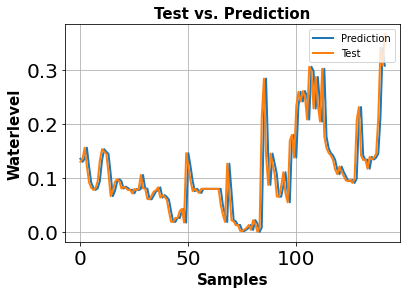

In [23]:
#Plot the output
Prediction, = plt.plot(pred_list, linewidth=2, label='label1')
Test, = plt.plot(y_con,linewidth=2, label='label1')
plt.legend(["Prediction", "Test"], loc ="upper right")
plt.title('Test vs. Prediction',fontsize=15,weight = 'bold')
plt.xlabel('Samples',fontsize=15,weight = 'bold')
plt.ylabel('Waterlevel',fontsize=15, weight = 'bold')
plt.tick_params(axis='both',labelsize=20)
plt.tick_params(axis = 'x', labelsize = 20)
plt.grid(True)
plt.show()

## Prediction using ARIMA (Autoregressive Integrated Moving Average) 
- **AR**: Autoregression : Dependent relationship between an observation and some number of lagged observations.

- **I**: Integrated: The use of differencing - subtracting an observation from an observation at the previous time step in order to make the time series stationary.

- **MA**: Moving Average : dependency between an observation and a residual error from a moving average model applied to lagged observations.

- ARIMA (p,d,q) : (lag order, degree of differencing, size of the moving average window)

In [24]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

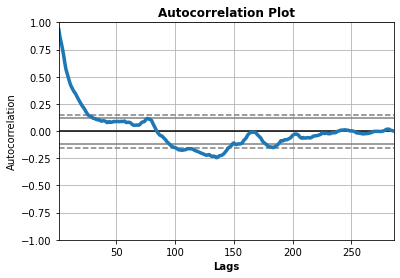

In [25]:
import warnings
warnings.filterwarnings('ignore')
data_arima = np.array(data_list)
autocorrelation_plot(data_arima,linewidth=3.5)
plt.title("Autocorrelation Plot", weight = 'bold')
plt.xlabel("Lags", weight = 'bold')
plt.show()
# lets consider a lag order of 15
# the data is not statinary hence the degree of differencing is one 
# moving avarage window is zero

In [30]:
# fitting the model
size = int(len(data_arima) * 0.5)
train_arima, test_arima = data_arima[0:size], data_arima[size:len(data_arima)]
history = [data_arima for data_arima in train_arima]
predictions_arima = list()
for i in range(len(test_arima)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat_arima = output[0]
    predictions_arima.append(yhat_arima)
    obs = test_arima[i]
    history.append(obs)

RMSE: 0.041


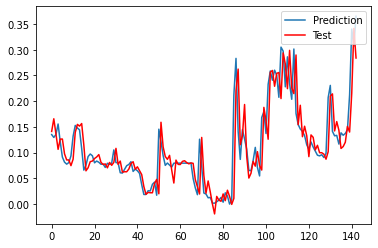

In [31]:
# evaluate forecasts
rmse_arima = sqrt(mean_squared_error(test_arima, predictions_arima))
print('RMSE: %.3f' % rmse_arima)
# plot forecasts against actual outcomes
Test,= plt.plot(test_arima)
Prediction,= plt.plot(predictions_arima, color='red')
plt.legend(["Prediction", "Test"], loc ="upper right")
plt.show()